<a href="https://colab.research.google.com/github/Sniperpilot16/DSPS_MRichardson/blob/master/DSPS_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KS_earthquakes Michael Richardson

1.) What is the test's Null Hypothsis that the K-S test tests?

There is no statistically significant relationship between the date and time of the earthquakes and their magnitude

2.) What is the "statistic" or "pivotal quantity" that the test uses?

The statistic quantity is the date and time of the earthquakes

 What does the probability distribution of this statistic depend on? 

This depends on the interval between the magnitude of each earthquake and the period between each earthquake

In [11]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


Data Retrival 

In [0]:
eqdata = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW3/earthquakes.csv",sep = ' ')

Data Ingestion

In [13]:
eqdata.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,LON,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,DEPTH,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,70798.000000,0.0,0.0,70798.000000,70798.00000,0.0,9648.000000,7.359000e+03,4.628900e+04,14096.000000,10889.000000,43932.000000,21302.000000,33735.000000,18080.000000,12705.000000,3387.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.417826,NaN,NaN,33.977749,-116.88145,NaN,13.354343,6.097558e+06,4.482677e+06,524649.772205,16307.082193,43.634321,141.903530,203.562443,78.426383,55.085714,43.415412,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.407683,NaN,NaN,1.156586,1.07667,NaN,2.724517,4.441852e+06,3.130379e+06,281055.136911,25237.230734,121.795817,311.415589,155.337382,56.105321,30.519535,24.266088,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.76000,NaN,10.000000,1.000432e+06,1.070000e+02,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.120000,NaN,NaN,33.061000,-117.69200,NaN,11.200000,3.041641e+06,3.031237e+06,136998.250000,27.000000,18.000000,14.000000,113.000000,48.000000,33.000000,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,34.056750,-116.59000,NaN,12.800000,3.229114e+06,3.110080e+06,703081.500000,57.000000,28.000000,23.000000,168.000000,70.000000,50.000000,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.590000,NaN,NaN,34.591000,-116.25100,NaN,14.900000,9.669999e+06,9.027968e+06,725926.500000,37764.000000,42.000000,137.000000,294.000000,92.000000,71.000000,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.100000,NaN,NaN,37.985500,-113.71900,NaN,29.300000,3.736673e+07,9.875061e+06,754723.000000,71774.000000,3384.000000,3815.000000,1574.000000,996.000000,227.000000,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
eqdata.shape

(70798, 34)

In [15]:
eqdata.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,LON,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,DEPTH,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,-116.433,NaN,NaN,1.6,C,NaN,NaN,NaN,28255.0,NaN,NaN,13.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,-116.295,NaN,NaN,5.4,C,NaN,NaN,NaN,28259.0,NaN,NaN,18.0,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,-117.628,NaN,NaN,5.6,C,NaN,NaN,NaN,28260.0,NaN,NaN,13.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,-116.780,NaN,13.8,C,NaN,NaN,NaN,28270.0,NaN,NaN,19.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,-116.290,NaN,NaN,2.7,C,NaN,NaN,NaN,28553.0,NaN,NaN,40.0,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Prepare date-time column

In [16]:
eqdata = eqdata.rename(columns={"#YYY/MM/DD":"date", "HH:mm:SS.ss":"time", "Unnamed: 5":"magnitude"})
eqdata = eqdata[["date", "time", "magnitude"]]
eqdata


,date,time,magnitude
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13
5,1984/01/01,19:39:19.67,2.13
6,1984/01/01,20:19:47.21,2.02
7,1984/01/02,03:51:52.76,2.97
8,1984/01/02,05:00:12.44,3.24
9,1984/01/02,05:02:17.29,2.17


In [17]:
eqdata.head()

,date,time,magnitude
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [18]:
eqdata.describe()

,magnitude
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


In [19]:
eqdata.time.dtype, eqdata.date.dtype

(dtype('O'), dtype('O'))

In [20]:
eqdata['datetime'] = eqdata['date'] + ' ' + eqdata['time']

eqdata['datetime'] = pd.to_datetime(eqdata.datetime, errors = 'coerce')

lista = range(0, 70798)

for j in lista:
  if pd.isnull(eqdata.datetime[j]) == True:
    print(lista[j])

1723
25538
34227
50211
59503


In [21]:
pd.datetime()

TypeError: ignored

In [23]:
eqdata.head()

,date,time,magnitude,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


In [0]:
eqdata = eqdata.drop([1723, 25538, 34227, 50211, 59503], axis = 0)

In [25]:
eqdata.head()

,date,time,magnitude,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


Select Valuable Data

In [26]:
ss = []



# loop through all year pairs as year and fraction of year

for t in [(1984, 1986.5), 

          (1990.3, 1992.1), 

          (1994.6, 1995.6),

          (1996.1,1996.5), 

          (1997,1997.6), 

          (1997.75,1998.15), 

          (1998.25,1999.35), 

          (2000.55,2000.8),

          (2000.9 ,2001.25), 

          (2001.6 ,2002), 

          (2002.5 ,2003)]:

    

    # for each pair I convert the year to datetime (easy)

    # then I convert the fraction of year and convert it to days and convert that to a delta-time

    # finally I add that deltatime to the year datetime. 

    ss.append((pd.to_datetime(int(t[0]), format="%Y") 

        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),

               pd.to_datetime(int(t[1]), format="%Y") 

        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))





############



print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))





############



# data between start and end of first time period

gooddates = (((eqdata.datetime >= ss[0][0]) & (eqdata.datetime <= ss[0][1])) |\

        # data between start and end of second time period

        ((eqdata.datetime >=ss [1][0]) & (eqdata.datetime <= ss[1][1])) |\

        ((eqdata.datetime >=ss [2][0]) & (eqdata.datetime <= ss[2][1])) |\

        ((eqdata.datetime >=ss [3][0]) & (eqdata.datetime <= ss[3][1])) |\

        ((eqdata.datetime >=ss [4][0]) & (eqdata.datetime <= ss[4][1])) |\

        ((eqdata.datetime >=ss [5][0]) & (eqdata.datetime <= ss[5][1])) |\

        ((eqdata.datetime >=ss [6][0]) & (eqdata.datetime <= ss[6][1])) |\

        ((eqdata.datetime >=ss [7][0]) & (eqdata.datetime <= ss[7][1])) |\

        ((eqdata.datetime >=ss [8][0]) & (eqdata.datetime <= ss[8][1])) |\

        ((eqdata.datetime >=ss [9][0]) & (eqdata.datetime <= ss[9][1])) |\

        # data between start and end of last time period

        ((eqdata.datetime >=ss [10][0]) & (eqdata.datetime <= ss[10][1])\

        ).values)

gooddates

the 11 timestamp pairs that are the boundaries of good data periods are:


0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
70768    True
70769    True
70770    True
70771    True
70772    True
70773    True
70774    True
70775    True
70776    True
70777    True
70778    True
70779    True
70780    True
70781    True
70782    True
70783    True
70784    True
70785    True
70786    True
70787    True
70788    True
70789    True
70790    True
70791    True
70792    True
70793    True
70794    True
70795    True
70796    True
70797    True
Name: datetime, Length: 70793, dtype: bool

replace + with | and then * with and


In [27]:
print("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss))))

SyntaxError: ignored

In [28]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

In [29]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 18849 earthquakes falling in the selected stationary periods


In [0]:
eqGoodData = eqdata[gooddates]

In [31]:
eqGoodData.shape

(18849, 4)

In [32]:
eqGoodData.head()


,date,time,magnitude,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


In [33]:
eqGoodData.shape

(18849, 4)

In [34]:
array_ = np.diff(pd.Series(eqGoodData.datetime).array)
array_ = np.insert(array_, 0, 0, axis = 0)
array_.astype(int)
eqGoodData['gap'] = array_.astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [35]:
len(array_)
len(eqGoodData)

array_
len(array_)

18849

In [36]:
eqGoodData.head()

,date,time,magnitude,datetime,gap
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,0
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,30474500000000


In [37]:
eqGoodData.shape

(18849, 5)

In [38]:
eqGoodData.head()

,date,time,magnitude,datetime,gap
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,0
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,30474500000000


In [39]:
eqGoodData.describe()

,magnitude,gap
count,18849.000000,1.884900e+04
mean,2.399529,3.180661e+13
std,0.392451,1.104014e+15
min,2.000000,0.000000e+00
25%,2.110000,2.736680e+12
50%,2.290000,8.946280e+12
75%,2.570000,2.133959e+13
max,5.800000,1.199632e+17


In [0]:
eqGoodData = eqGoodData.drop([0], axis= 0)

In [41]:
eqGoodData.head()

,date,time,magnitude,datetime,gap
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,30474500000000
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,59880000000


Data Exploration

Text(0, 0.5, 'Frequency')

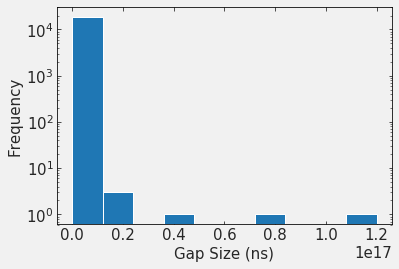

In [42]:
pl.hist(eqGoodData['gap'], log = True)
pl.xlabel('Gap Size (ns)')
pl.ylabel('Frequency')

In [43]:
eqGoodData = eqGoodData[eqGoodData.gap <= 2.6*10**15]
eqGoodData.describe()

,magnitude,gap
count,18838.000000,1.883800e+04
mean,2.399654,1.554381e+13
std,0.392513,1.880540e+13
min,2.000000,1.700000e+08
25%,2.110000,2.736248e+12
50%,2.290000,8.938365e+12
75%,2.570000,2.129848e+13
max,5.800000,2.365828e+14


Text(0, 0.5, 'Frequency')

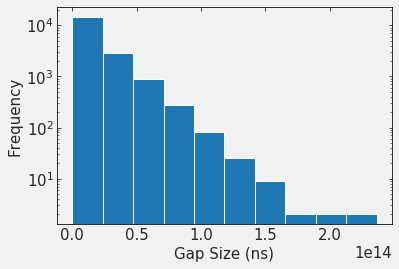

In [44]:
pl.hist(eqGoodData['gap'], log = True)
pl.xlabel('Gap Size (ns)')
pl.ylabel('Frequency')

Data Analysis

In [0]:
alpha = 1 - 0.9973

In [54]:
thresholds = [0.01,0.001]
mag_list = [2.0,2.5,3.0,3.5,4.0]

x_mk=np.empty([len(mag_list),len(thresholds)],dtype='O')

for threshold in thresholds:
  for mk in range(len(mag_list)):
    x_mk[mk][thresholds.index(threshold)]=eqGoodData.gap.where(eqGoodData.magnitude>mag_list[mk]).dropna()
    for _ in [1,2]:
      #calculate the rk 
      rk = 1/np.mean(x_mk[mk][thresholds.index(threshold)])
      print(rk)
      #broadcast once more to now get the values where mk*rk is greater than threshold
      x_mk[mk][thresholds.index(threshold)] = x_mk[mk][thresholds.index(threshold)].where(x_mk[mk][thresholds.index(threshold)]*rk>threshold).dropna()*rk
      print(str(np.mean(x_mk[mk][thresholds.index(threshold)]))+'\n')
      
    print("\n\n")
    
  for mk in range(len(mag_list)):
    for ml in range(mk+1,len(mag_list)):
      print(mk,ml)
      #print the statistcis and p values for the values of mk and ml
      print(stats.ks_2samp(x_mk[mk][thresholds.index(threshold)].values,x_mk[ml][thresholds.index(threshold)].values),"\n")
      
for i in [0,1,2,3,4]:
  for j in [0,1]:
    print(len(x_mk[i][j]))
        

6.434755053043147e-14
1.047920780923528

0.9542706072864633
1.0009226781298688




6.796399868587622e-14
1.0589242145947533

0.9443546442865098
1.0017146513830506




6.950308020104612e-14
1.0802470355539338

0.9257141811893199
1.0030191777186424




6.749924371256141e-14
1.0929032449127007

0.9149940808162559
1.0025721253373236




5.862185852912074e-14
1.0823473995713828

0.9239177739014359
1.0185098178118415




0 1
Ks_2sampResult(statistic=0.015247629434355287, pvalue=0.31160764333837937) 

0 2
Ks_2sampResult(statistic=0.02299262724588108, pvalue=0.5397143511869957) 

0 3
Ks_2sampResult(statistic=0.06387513831460023, pvalue=0.09257997807311825) 

0 4
Ks_2sampResult(statistic=0.1047685812364576, pvalue=0.1935582269890511) 

1 2
Ks_2sampResult(statistic=0.017831377452866486, pvalue=1.0) 

1 3
Ks_2sampResult(statistic=0.05624041214652988, pvalue=0.1986587555511784) 

1 4
Ks_2sampResult(statistic=0.10343662012348387, pvalue=0.19748021731085785) 

2 3
Ks_2sampResult(statistic=0.05503840

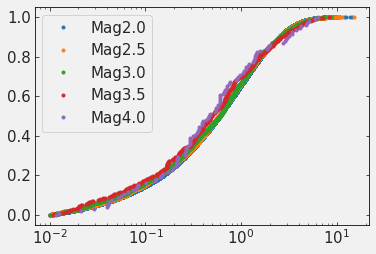

In [53]:
x_mk_sort= np.zeros_like(x_mk)
for i in range(len(x_mk)):
  for j in range(len(x_mk[i])):
    x_mk_sort[i,j] = np.sort(x_mk[i,j].values)

for i in range(len(x_mk_sort)):
  pl.plot(x_mk_sort[i][0],np.linspace(0,1,num=len(x_mk_sort[i][0])),'.',  label= 'Mag' + str(mag_list[i]))

pl.legend()
pl.xscale('log')

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? Discuss

There is not a significant difference in the distributions. This means that the data given in the CSV file was accurate enough to the data they presented, meaning they did not use a publication bias. Each graph is nearly identical.

In [0]:
pl.imshow((ks_001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");